In [1]:
# Dependencies
import os
import csv
import json
import time
import requests
import pandas as pd
import numpy as np
import scipy.stats as sts
from pprint import pprint
from config import api_key
from citipy import citipy
import matplotlib.pyplot as plt

output_csv = os.path.join("../Resources","")
output_dir = os.path.join("../Figures","")

In [2]:
## Create latitudes and cities lists variables and initialize them as empty lists
cities = []
# Generate a list of cities using a random function up to 1500 in size for scanning
# Note: larger number of cities can be obtained with larger size, however for this task only about 500 are required
latitude = np.random.uniform(low=-90.000, high=90.000, size=2000)
longitude = np.random.uniform(low=-180.000, high=180.000, size=2000)

latitudes_longitudes = zip(latitude, longitude)
count_cities_500 = 0
for latitude_longitude in latitudes_longitudes:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    # If city is not in cities, then append the city to the cities' list. Limit the city list to 500
    if city not in cities:
        if count_cities_500 < 600:
            cities.append(city)
            count_cities_500 += 1
        else:
            break
    else:
        continue
print(f"First five are listed here: {cities[:5]}...")
print(f"Total number of cities is limited to {len(cities)}")

First five are listed here: ['hermanus', 'luderitz', 'kruisfontein', 'cape town', 'barrow']...
Total number of cities is limited to 600


In [3]:
# url for weather api
units = 'english'
url   = "http://api.openweathermap.org/data/2.5/weather?q="
url2  = "http://api.openweathermap.org/data/2.5/group?id=524901,703448,2643743&units=metric"
city_5_list      = cities[:5]
city_list        = []
temp_list        = []
temp_list_C      = []
lat_list         = []
long_list        = []
humid_list       = []
cloud_list       = []
wind_list        = []
city_id_list     = []
counter          = 0 # Use this counter to limit amount of calls without sleep
city_id          = 0 # Unique City Identifier number
total_city_count = 1 # Total count for the cities fetched
for city in cities:
    try:
        if counter < 50:
            query_test_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
            response = requests.get(query_test_url).json()
            city_list.append(response["name"])
            city_id = response["id"]
            city_id_list.append(response["id"])
            print(f"| #{total_city_count}: City {city.capitalize()} with ID ({city_id}) is found.")
            temp_K = response["main"]["temp"]
            temp_C = round((temp_K - 273.15), 2)
            temp_list_C.append(temp_C)
            temp_list.append(response["main"]["temp"])
            lat_list.append(response["coord"]["lat"])
            long_list.append(response["coord"]["lon"])
            humid_list.append(response["main"]["humidity"])
            cloud_list.append(response["clouds"]["all"])
            wind_list.append(response["wind"]["speed"])
            counter = counter + 1
            total_city_count = total_city_count + 1
        else:
            counter = 0
            time.sleep(2) # sleep for 2 seconds before restarting calling weather API
            print(f"********** Reset counter and wait for 2 seconds **********")
            city_id = response["id"]
            city_id_list.append(response["id"])
            city_list.append(response["name"])
            print(f"| #{total_city_count}: City {city.capitalize()} with ID ({city_id}) is found.")
            temp_K = response["main"]["temp"]
            temp_C = round((temp_K - 273.15), 2)
            temp_list_C.append(temp_C)
            temp_list.append(response["main"]["temp"])
            lat_list.append(response["coord"]["lat"])
            long_list.append(response["coord"]["lon"])
            humid_list.append(response["main"]["humidity"])
            cloud_list.append(response["clouds"]["all"])
            wind_list.append(response["wind"]["speed"])
            total_city_count = total_city_count + 1
            continue
    except KeyError:
        print(f"City '{city.capitalize()}' was not found.")
print(f"Temp in DegK: {temp_K} = {temp_C}DegC.")
print("=========================================")
print("Fetching data completed")
print("=========================================")

| #1: City Hermanus with ID (3366880) is found.
| #2: City Luderitz with ID (3355672) is found.
| #3: City Kruisfontein with ID (986717) is found.
| #4: City Cape town with ID (3369157) is found.
| #5: City Barrow with ID (5880054) is found.
| #6: City Wang saphung with ID (1605102) is found.
| #7: City Tasiilaq with ID (3424607) is found.
| #8: City Ushuaia with ID (3833367) is found.
| #9: City Albany with ID (5106841) is found.
| #10: City Punta arenas with ID (3874787) is found.
| #11: City Bermejo with ID (3864299) is found.
City 'Sentyabrskiy' was not found.
| #12: City Micheweni with ID (153955) is found.
| #13: City Rikitea with ID (4030556) is found.
| #14: City Victoria with ID (1819729) is found.
| #15: City Thompson with ID (6165406) is found.
City 'Bacuit' was not found.
| #16: City Anadyr with ID (2127202) is found.
City 'Illoqqortoormiut' was not found.
| #17: City Provideniya with ID (4031574) is found.
| #18: City Carnarvon with ID (2074865) is found.
| #19: City Palme

| #157: City Naze with ID (1855540) is found.
| #158: City Alofi with ID (4036284) is found.
| #159: City Tamworth with ID (2636276) is found.
| #160: City Pahalgam with ID (1260880) is found.
| #161: City Qaanaaq with ID (3831208) is found.
| #162: City Asau with ID (686090) is found.
| #163: City Nemuro with ID (2128975) is found.
| #164: City Kahului with ID (5847411) is found.
| #165: City Mocuba with ID (1024312) is found.
| #166: City Stawell with ID (2148431) is found.
| #167: City Mahebourg with ID (934322) is found.
| #168: City Progreso with ID (3521108) is found.
| #169: City Esperance with ID (2071860) is found.
| #170: City Tucurui with ID (3385935) is found.
| #171: City Camopi with ID (3382226) is found.
| #172: City Cockburn town with ID (3576994) is found.
| #173: City Talnakh with ID (1490256) is found.
| #174: City Kavieng with ID (2094342) is found.
| #175: City Sao lourenco do sul with ID (3448596) is found.
| #176: City Auki with ID (2109701) is found.
| #177: Cit

City 'Nizhneyansk' was not found.
| #308: City Ketchikan with ID (5554428) is found.
| #309: City North platte with ID (5697939) is found.
| #310: City Bors with ID (684161) is found.
| #311: City Zapolyarnyy with ID (464790) is found.
| #312: City Glendive with ID (5654391) is found.
| #313: City Iqaluit with ID (5983720) is found.
| #314: City Turiacu with ID (3385908) is found.
| #315: City Homer with ID (5864145) is found.
| #316: City Nueve de julio with ID (3842881) is found.
| #317: City Koutiala with ID (2454268) is found.
| #318: City Krasnoselkup with ID (1502073) is found.
| #319: City Sur with ID (286245) is found.
| #320: City Baykit with ID (1510689) is found.
| #321: City Qaqortoq with ID (3420846) is found.
| #322: City Thomaston with ID (4226364) is found.
| #323: City Ibadan with ID (2339354) is found.
| #324: City Necochea with ID (3430443) is found.
| #325: City Odweyne with ID (53372) is found.
| #326: City Uaua with ID (3385883) is found.
| #327: City Quzhou with 

********** Reset counter and wait for 2 seconds **********
| #459: City Asyut with ID (901766) is found.
| #460: City Jaru with ID (3925040) is found.
| #461: City Yovon with ID (1220112) is found.
| #462: City Praia da vitoria with ID (3372760) is found.
| #463: City Miandrivazo with ID (1059051) is found.
| #464: City Madera with ID (5369578) is found.
| #465: City Barcelos with ID (2742416) is found.
| #466: City Zhezkazgan with ID (1516589) is found.
| #467: City Sarangani with ID (1687186) is found.
| #468: City Emerald with ID (2167426) is found.
| #469: City Mahon with ID (2514301) is found.
| #470: City Mtambile with ID (152877) is found.
| #471: City San policarpo with ID (1688696) is found.
| #472: City Salihorsk with ID (622428) is found.
| #473: City Nikel with ID (522260) is found.
| #474: City Nabire with ID (1634614) is found.
| #475: City Mitsamiouli with ID (921786) is found.
| #476: City Cao bang with ID (1586185) is found.
| #477: City Takoradi with ID (2294915) is f

In [4]:
# Check the readings of the temperature
query_test_url = f"http://api.openweathermap.org/data/2.5/weather?q=Paris&appid={api_key}"
query_test_url    


'http://api.openweathermap.org/data/2.5/weather?q=Paris&appid=8d3fef753a916acc8df61a629cda8e70'

In [5]:
print(f"There are {len(cities)} cities in the 'cities' list.")

There are 600 cities in the 'cities' list.


In [6]:
# Create a dataframe from the collected data
weather_df = pd.DataFrame({'City': city_list,
                           'Temperature (DegC)': temp_list_C,
                           'Cloudiness (%)': cloud_list,
                           'Latitude': lat_list,
                           'Longitude': long_list,
                           'Humidity (%)': humid_list,
                           'Wind Speed (mps)': wind_list})
weather_df.to_csv(f"{output_csv}weather_data.csv", index = False)
weather_df.head()

,City,Temperature (DegC),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
0,Hermanus,10.00,0,-34.42,19.23,94,2.47
1,Lüderitz,18.00,0,-26.65,15.16,23,2.10
2,Kruisfontein,10.77,0,-34.00,24.73,79,2.78
3,Cape Town,10.58,0,-33.93,18.42,100,2.60
4,Barrow,3.00,90,71.29,-156.79,74,5.70


In [22]:
# For the Web development home work, export the dataframe as html
weather_df.to_html(open('weather_df.html', 'w'))

In [7]:
# Extract data for the northern hemisphere
northern_weather_df = weather_df.loc[weather_df['Latitude'] >= 0]
northern_weather_df.head()

,City,Temperature (DegC),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
4,Barrow,3.00,90,71.29,-156.79,74,5.70
5,Wang Saphung,25.00,40,17.30,101.77,100,1.00
6,Tasiilaq,7.00,13,65.61,-37.64,75,2.10
8,Albany,26.65,43,42.60,-73.97,59,1.51
13,Hong Kong,30.57,79,22.29,114.16,70,4.47


In [8]:
# Extract data for the southern hemisphere
southern_weather_df = weather_df.loc[weather_df['Latitude'] < 0]
southern_weather_df.head()

,City,Temperature (DegC),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
0,Hermanus,10.00,0,-34.42,19.23,94,2.47
1,Lüderitz,18.00,0,-26.65,15.16,23,2.10
2,Kruisfontein,10.77,0,-34.00,24.73,79,2.78
3,Cape Town,10.58,0,-33.93,18.42,100,2.60
7,Ushuaia,0.00,75,-54.80,-68.30,95,2.60


In [9]:
# Extract column data to use for a scatter plot
temp_north  = northern_weather_df['Temperature (DegC)']
humid_north = northern_weather_df['Humidity (%)']
cloud_north = northern_weather_df['Cloudiness (%)']
wind_north  = northern_weather_df['Wind Speed (mps)']
lat_north   = northern_weather_df['Latitude']

print(cloud_north[:5])

4     90
5     40
6     13
8     43
13    79
Name: Cloudiness (%), dtype: int64


In [10]:
# Extract data for the Southern hemisphere
temp_south  = southern_weather_df['Temperature (DegC)']
humid_south = southern_weather_df['Humidity (%)']
cloud_south = southern_weather_df['Cloudiness (%)']
wind_south  = southern_weather_df['Wind Speed (mps)']
lat_south   = southern_weather_df['Latitude']

print(cloud_south[:5])

0     0
1     0
2     0
3     0
7    75
Name: Cloudiness (%), dtype: int64


In [11]:
def plot_linear_regression(y_axis, x_axis, title, ylabel, xlabel):
    # Plot temperature vs. latitude for the Northern hemisphere
    plt.scatter(x_axis, y_axis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    m, b = np.polyfit(x_axis, y_axis, 1)
    plt.plot(x_axis, m*x_axis + b)
    plt.savefig(f"Figures/{title}.png")
    plt.show()
    # Identify Pearson value
    print(f"Pearson's correlation is = {round(sts.pearsonr(x_axis, y_axis)[0],2)} ({title}).")
#plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear positive correlation between the temperature and the latitude.
This relationship shows that with the latitude approaching 0 deg, which is an equator, 
the temperature is increasing.



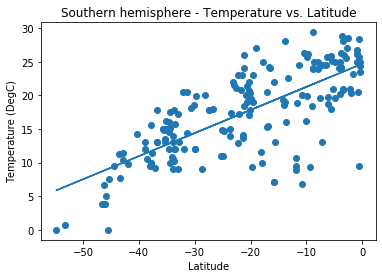

Pearson's correlation is = 0.73 (Southern hemisphere - Temperature vs. Latitude).


In [12]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear positive correlation between the temperature and the latitude.
This relationship shows that with the latitude approaching 0 deg, which is an equator, 
the temperature is increasing.
''')
plot_linear_regression(temp_south, lat_south, "Southern hemisphere - Temperature vs. Latitude", "Temperature (DegC)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear negative correlation between the temperature and the latitude.
This relationship shows that with the latitude moving from 0 deg to the north pole, 
the temperature is decreasing.



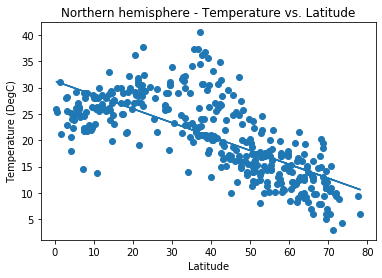

Pearson's correlation is = -0.72 (Northern hemisphere - Temperature vs. Latitude).


In [13]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear negative correlation between the temperature and the latitude.
This relationship shows that with the latitude moving from 0 deg to the north pole, 
the temperature is decreasing.
''')
plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegC)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average cloudiness is about 38%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more sunny days, - with 0% cloudiness. 



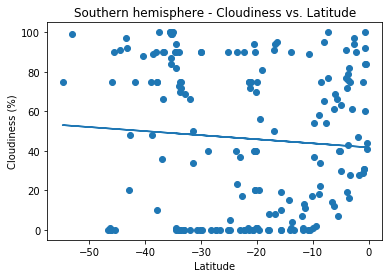

Pearson's correlation is = -0.08 (Southern hemisphere - Cloudiness vs. Latitude).


In [14]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average cloudiness is about 38%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more sunny days, - with 0% cloudiness. 
''')
plot_linear_regression(cloud_south, lat_south, "Southern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average cloudiness is about 45%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more days that are located on the 0 and 100% readings. 



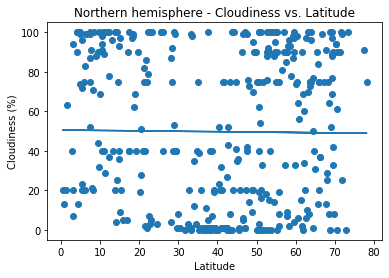

Pearson's correlation is = -0.01 (Northern hemisphere - Cloudiness vs. Latitude).


In [15]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average cloudiness is about 45%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more days that are located on the 0 and 100% readings. 
''')
plot_linear_regression(cloud_north, lat_north, "Northern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")


 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average humidity is about 70%.
When looking at the plot there is no clear correlation.
Humidity is quite high throughout the southern hemisphere



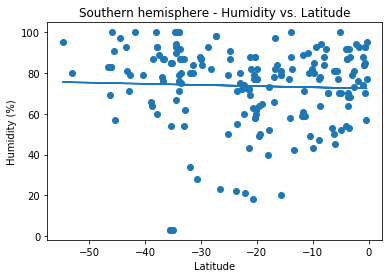

Pearson's correlation is = -0.04 (Southern hemisphere - Humidity vs. Latitude).


In [16]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average humidity is about 70%.
When looking at the plot there is no clear correlation.
Humidity is quite high throughout the southern hemisphere
''')
plot_linear_regression(humid_south, lat_south, "Southern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average humidity is about 65%.
When looking at the plot, there is no clear correlation.
The humidity seems to be more evenly spread in the latitude range between 15 and 40 degrees. 



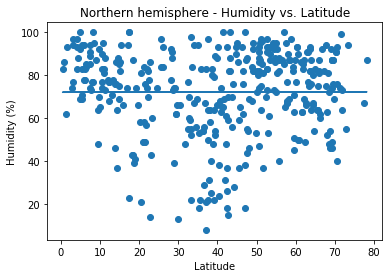

Pearson's correlation is = 0.0 (Northern hemisphere - Humidity vs. Latitude).


In [17]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average humidity is about 65%.
When looking at the plot, there is no clear correlation.
The humidity seems to be more evenly spread in the latitude range between 15 and 40 degrees. 
''')
plot_linear_regression(humid_north, lat_north, "Northern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average wind speed is about 3.3mps.
There are few days where the winds are stronger close to the equator.



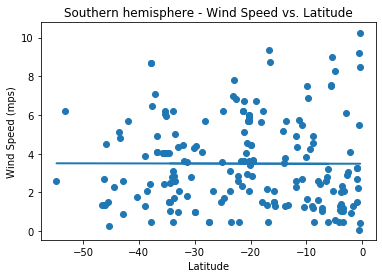

Pearson's correlation is = -0.0 (Southern hemisphere - Wind Speed vs. Latitude).


In [18]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average wind speed is about 3.3mps.
There are few days where the winds are stronger close to the equator.
''')
plot_linear_regression(wind_south, lat_south, "Southern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average wind speed is about 3.8%, 
which is slightly higher than in the Southern hemisphere.



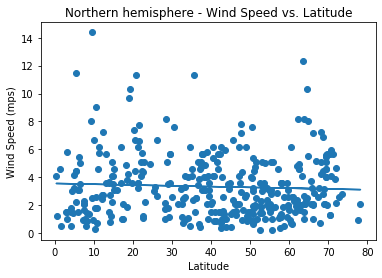

Pearson's correlation is = -0.05 (Northern hemisphere - Wind Speed vs. Latitude).


In [19]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average wind speed is about 3.8%, 
which is slightly higher than in the Southern hemisphere.
''')
plot_linear_regression(wind_north, lat_north, "Northern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")